Importacion de librerias

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              GradientBoostingRegressor)

from sklearn.metrics import ( 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    roc_auc_score,
    mean_squared_error,
    confusion_matrix)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa

from sklearn.model_selection import (
    KFold,
    cross_validate,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    HalvingGridSearchCV,
    StratifiedKFold)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

Funciones

In [6]:
def parejas(df):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [7]:
def correlaciones(data, n=5,metodo='pearson'):
    au_corr = data.corr(method=metodo).abs().unstack()
    labels_to_drop = parejas(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [8]:
def hist_box(variable,agrupado):
    fig,axes = plt.subplots(2,1,figsize=(15,10),
                            sharex = True,
                            gridspec_kw={'height_ratios':[1,3]})
    sns.boxplot(ax = axes[0],
                data = bank_df,
                x = variable,
                y = agrupado
                )
    sns.histplot(ax = axes[1],
                 data  =bank_df,
                 x = variable,
                 hue = agrupado,
                 kde = True,
                 )
    if agrupado == None: 
        plt.axvline(x=bank_df[variable].mean(), 
                   color = "red",
                   linestyle = "--",
                   label = "mean")
        plt.axvline(x=bank_df[variable].median(), 
                   color = "green",
                   linestyle = "--",
                   label = 'median')
        plt.legend(loc = 1)
        titulo = (f'HISTOGRAMA + BOXPLOT DE: {variable}')
    else:
        titulo = (f'HISTOGRAMA + BOXPLOT DE: {variable} SEGUN TARGET')
    plt.suptitle(titulo,fontsize=16,y = 0.9)
    axes[0].set(xlabel=None, ylabel=None)
    fig.set_facecolor('white')
    return(plt.show())

In [9]:
def graf_cat(variable):
    titulo = (f'Barras variables no numericas: {variable}')
    fig,axes = plt.subplots(1,2,figsize=(12,5),
                            sharex = True)
    sns.histplot(ax = axes[0],
                data = bank_df,
                x = variable
                )
    sns.histplot(ax = axes[1],
                 data  =bank_df,
                 x = variable,
                 hue = "Attrition_Flag",
                 multiple = 'fill'
                 )
    plt.suptitle(titulo,fontsize=16,y = 0.97)
#     ax.set(xlabel='common xlabel', ylabel='common ylabel')
    axes[0].set_title('Histograma')
    axes[0].set(xlabel=None, ylabel='count')
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].set_title('Barras 100%')
    axes[1].set(xlabel=None, ylabel='%')
    axes[1].tick_params(axis='x', rotation=90)
    fig.set_facecolor('white')
    return(plt.show())

In [90]:
def mat_conf(y_test,y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f')
  ax.set_title('Matriz de confusion con labels\n\n');
  ax.set_xlabel('\nValores predichos')
  ax.set_ylabel('Valores reales ');
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  return(plt.show())

FIN FUNCIONES

#ABANDONO DE CLIENTES EN TARJETAS DE CRÉDITO


**Integrante:**
- Alejandro Gutierrez 
- Lourdes Rojos
- Juan Pablo Manzano

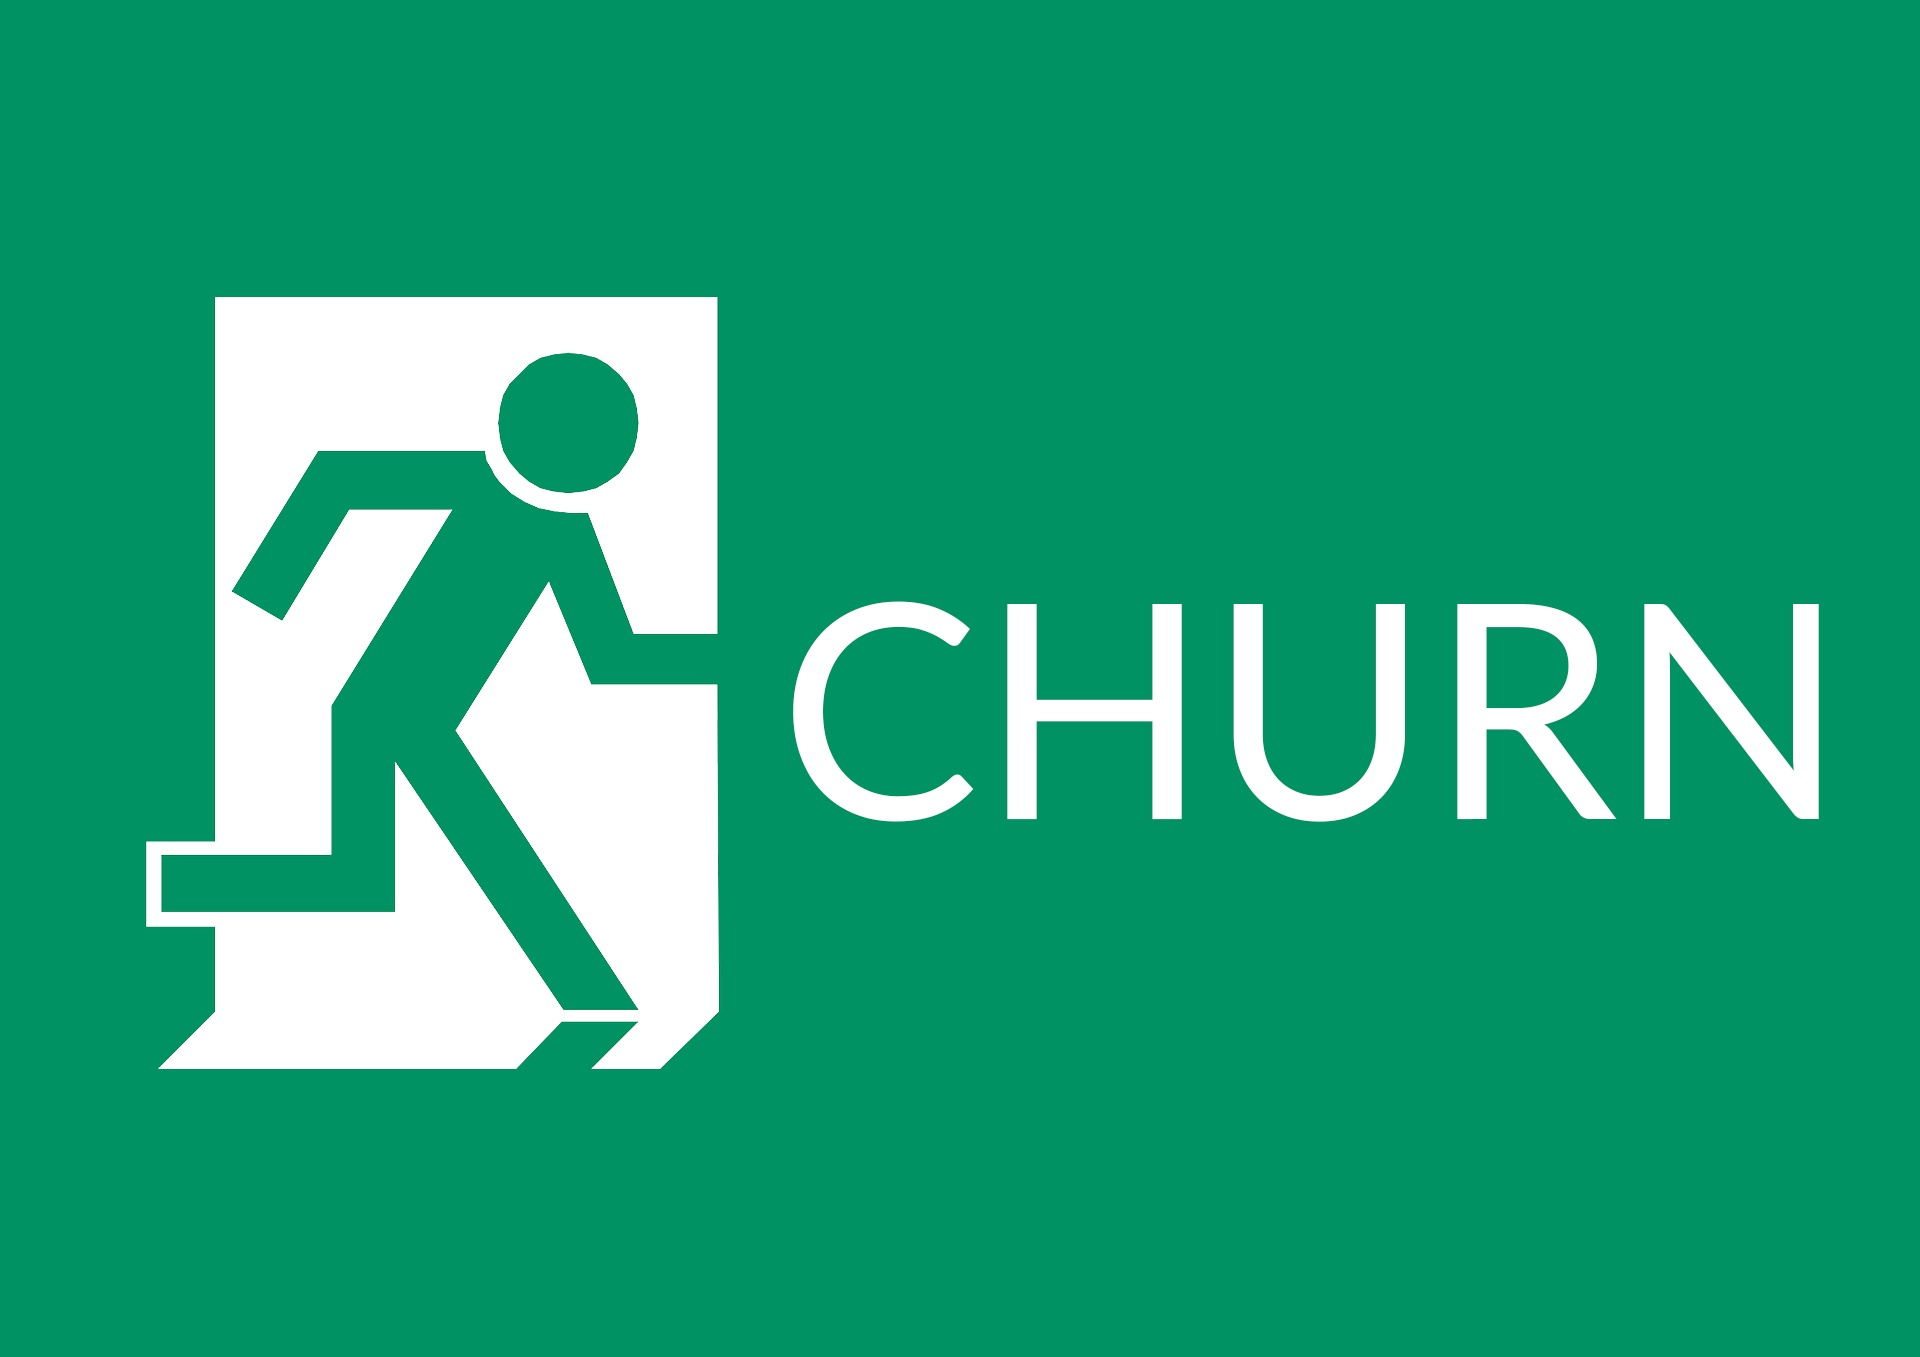

Como podremos saber, una empresa vende un producto o presta un servicio a sus clientes y de esto obtiene dinero, cumpliendo su objetivo principal el cual es generar ganancias.

Por ello, este proyecto aputanara a uno de los componentes mas importantes de una empresa que son los clientes. Mas especificamente, analizaremos el abandono de los mismos, o mas conocido como customer chrun en ingles. 

Utilizaremos un dataset brindando por un banco anonimo, con datos de su cartera de clientes. Como podremos observar el customer churn rate o taza de abandono de clientes es bastante elevado 

In [10]:
bank_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSz3Yx52trZcGRODnR1-aMr8bTTKZDGsZbJj1kw5ms_H5ZOypBXNd2Hyx1bn1A8sznMTQOtCUniEnvJ/pub?output=csv")

In [11]:
bank_df = bank_df.drop(columns=["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])

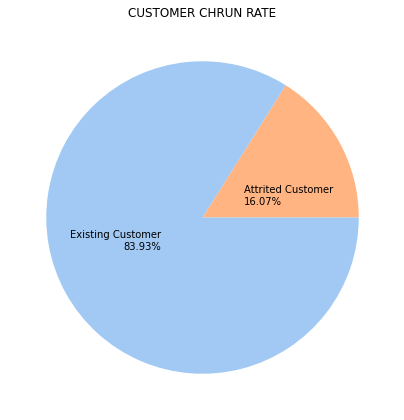

In [ ]:
client_count = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).count()
plt.subplots(figsize = (7,9))
plt.title("CUSTOMER CHRUN RATE")
plt.pie(client_count,
        labels = [client_count.index[0] + "\n" + (str(round((client_count[0]/(client_count[1]+client_count[0]))*100,2))) + "%",
                  client_count.index[1]+ "\n" + (str(round((client_count[1]/(client_count[1]+client_count[0]))*100,2))) + "%"],
        colors = (sns.color_palette('pastel')[1],sns.color_palette('pastel')[0]),
        labeldistance=0.3)

plt.show()

Esto quiere decir que desde el año anterior a dia de hoy el banco perdio un 16,07% de sus clientes. 

In [20]:
bank_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Glosario

**CLIENTNUM** Client number. Unique identifier for the customer holding the account

**Attrition_FlagInternal** event (customer activity) variable - if the account is closed then 1 else 0

**Customer_Age Demographic** variable - Customer's Age in Years

**Gender Demographic** variable - M=Male, F=Female

**Dependent_count** Demographic variable - Number of dependents

**Education_Level** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

**Marital_Status** Demographic variable - Married, Single, Divorced, Unknown

**Income_Category** Demographic variable - Annual Income Category of the account holder (<40K,40K-60K,60K-80K,80K-120K,>120K, Unknown)

**Card_Category** Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

**Months_on_book** Period of relationship with bank

**Total_Relationship_Count** Total no. of products held by the customer

**Months_Inactive_12_mon** No. of months inactive in the last 12 months

**Contacts_Count_12_mon** No. of Contacts in the last 12 months

**Credit_Limit Credit** Limit on the Credit Card

**Total_Revolving_Bal** Total Revolving Balance on the Credit Card

**Avg_Open_To_Buy** Open to Buy Credit Line (Average of last 12 months)

**Total_Amt_Chng_Q4_Q1** Change in Transaction Amount (Q4 over- Q1)

**Total_Trans_Amt** Total Transaction Amount (Last 12 months)

**Total_Trans_Ct** Total Transaction Count (Last 12 months)

**Total_Ct_Chng_Q4_Q1** Change in Transaction Count (Q4 over Q1)

**Avg_Utilization_Ratio** Average Card Utilization Ratio

# 1- OBJETIVOS

**Objetivos principales**

- Descubrir la causa por la cual hay deserción de clientes en las tarjetas de crédito
-Pronosticar cuales son los posibles clientes que abandonaran las tarjetas de crédito

**Objetivos secuendarios**

- Determinar que Modelo se adapta de mejor manera a las necesidades del problema
- Utilizar modelo para predecir grupos de clientes que abandonarian el banco
- Testear modelos generados

# 2-Contexto comercial

El Gerente comercial de un banco se encuentra frente a un listado de clientes que utilizan el servicio de tarjetas de crédito y detecta una alta taza de abandono de los mismos. Quieren analizar los datos para descubrir la razón detrás de esto y aprovechar lo mismo para predecir los clientes que probablemente abandonarán para poder tomar medidas sobre esto.

# 3- Problema comercial

### Hipótesis 1
H1 = La media del monto total de transacciones (Total_Trans_Amt) es igual para clientes activos y retirados

H0 = La media del monto total de transacciones (Total_Trans_Amt) es diferente para clientes activos y retirados

### Hipótesis 2


H2 = La media de la cantidad total de transacciones (Total_Trans_Ct) es **igual** para clientes activos y retirados

H0 = La media de la cantidad total de transacciones (Total_Trans_Ct) es **diferente** para clientes activos y retirados

## Hipótesis 3

H3 = La media de la variacion en cantidad de transacciones Q4 -Q1 (1) es **igual** para clientes activos y retirados 

H0 = La media de la variacion en cantidad de transacciones Q4 -Q1 (Total_Ct_Chng_Q4_Q1) es **diferente** para clientes activos y retirados

## Pregunta 1
 ¿Cúal es el género que más abandona la tarjeta de crédito?

## Pregunta 2
 Los que abandonan la tarjeta de crédito, ¿Cúal es su estado civil?

## Pregunta 3
 ¿Que edades promedio tienen las personas que abandonan las tarjetas de crédito?

## Pregunta 4
¿Cuanto tiempo en promedio llevan las tarjetas sin utilizar de las personas que abandonan la tarjeta de crédito?

## Pregunta 5 
¿Que tipo de tarjeta usan los clientes que abandonan los servicios?

## Pregunta 6 
¿Que nivel de educacion tienen los clientes que abanonan los servicios?

## Pregunta 7
¿Que nivel de ingresos tienen los clientes que abandonan los servicios?



# 4-Análisis Exploratorio de Datos (EDA)

In [12]:
bank_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
Total_Relationship_Count,10127.0,NaN,NaN,NaN,3.81258,1.554408,1.0,3.0,4.0,5.0,6.0


In [13]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [14]:
columns_name = list(bank_df.columns.values)

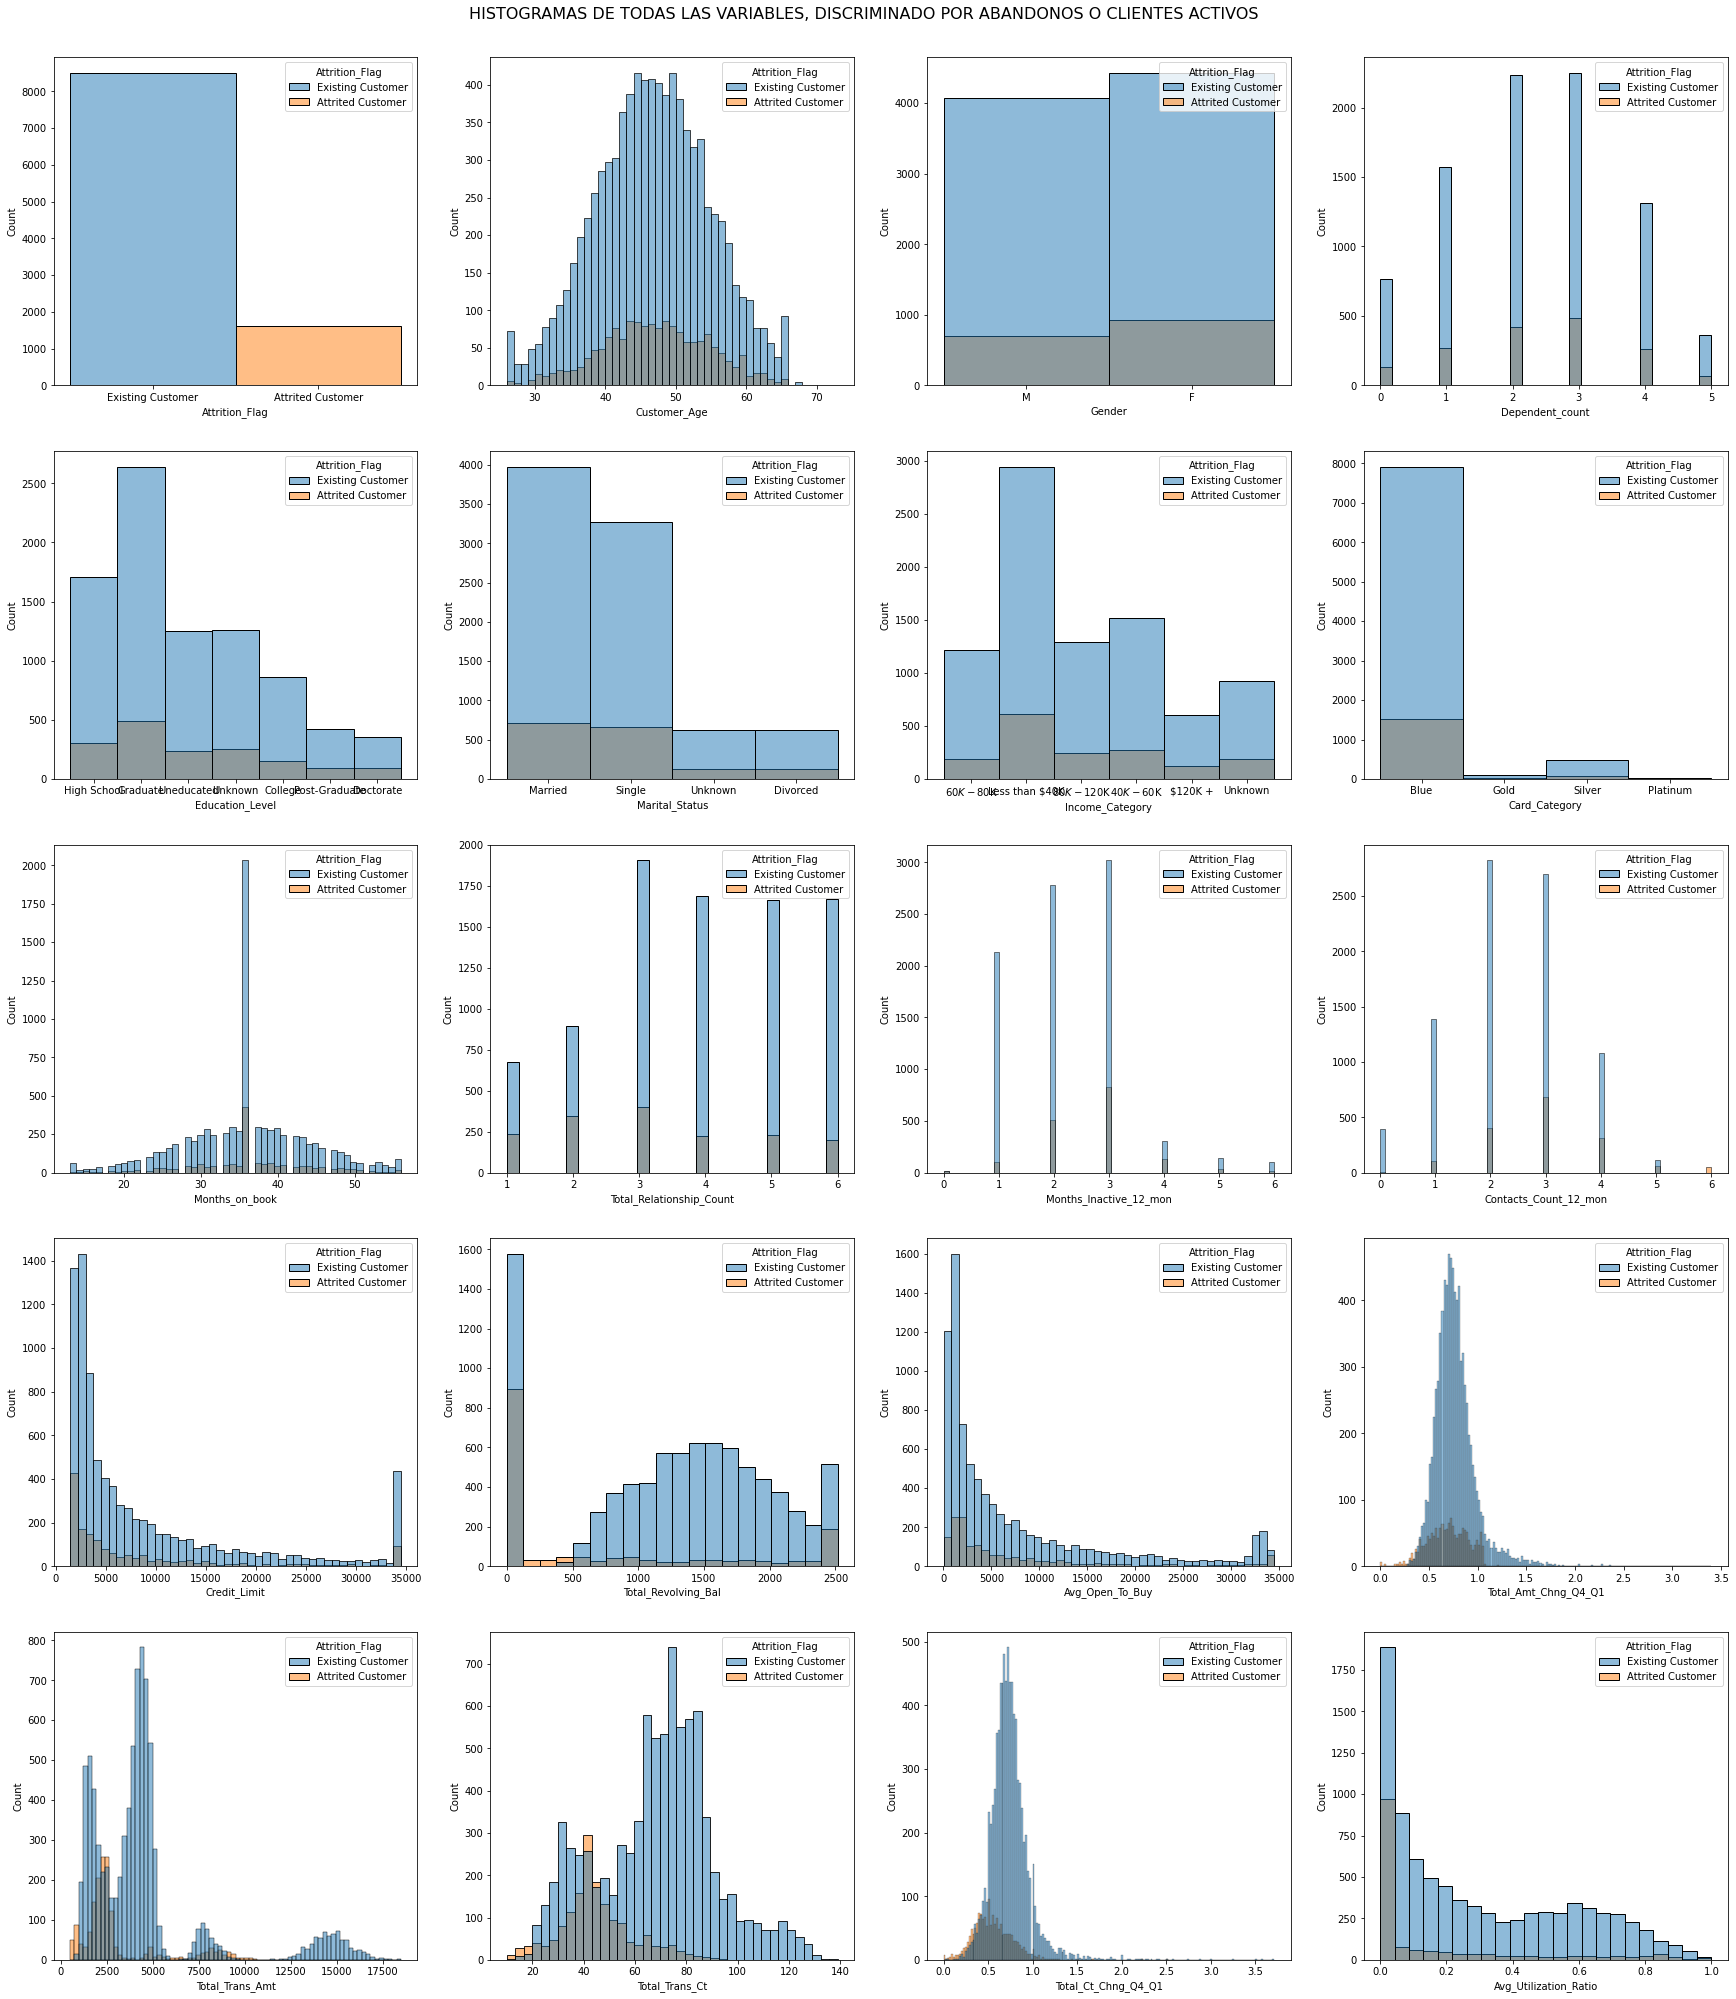

In [15]:
#  Se arma una lista con los nombres de las columnas para usarla a continuacion

fig , axes = plt.subplots(5,4,figsize = (30,35))
plt.suptitle('HISTOGRAMAS DE TODAS LAS VARIABLES, DISCRIMINADO POR ABANDONOS O CLIENTES ACTIVOS',fontsize=16,y = 0.9)
i = 0
for fil in range(5):
  for col in range(4):
    if i <=20:                     #esta condicion se plantea ya que las ultimas 2 columnas del dataset no hay que usarlas para analisi segun la pagina
        sns.histplot(data=bank_df,
              ax=axes[fil,col],
              x=columns_name[i],
              hue = 'Attrition_Flag'
              )
        i = i + 1
plt.show()

In [16]:
var_num = bank_df.select_dtypes(include = ["number"]).columns

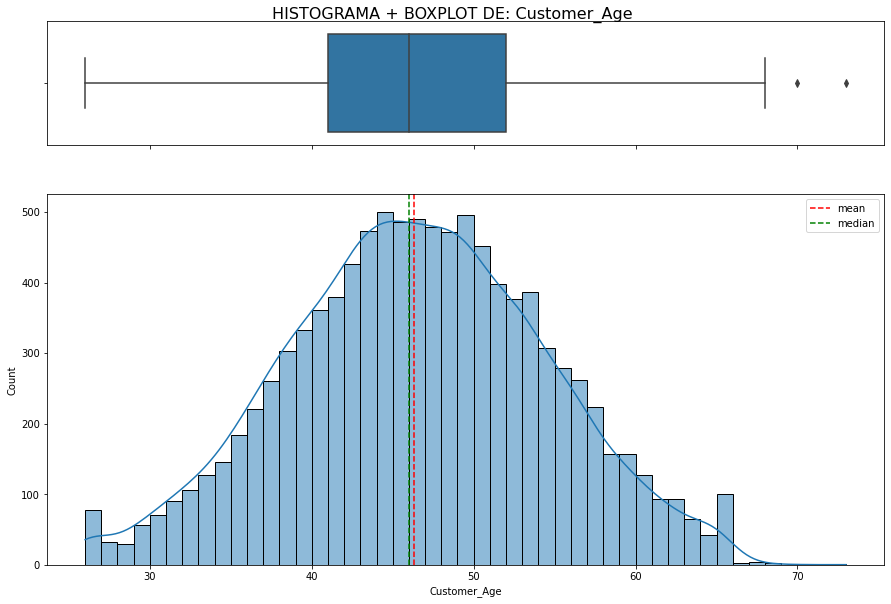

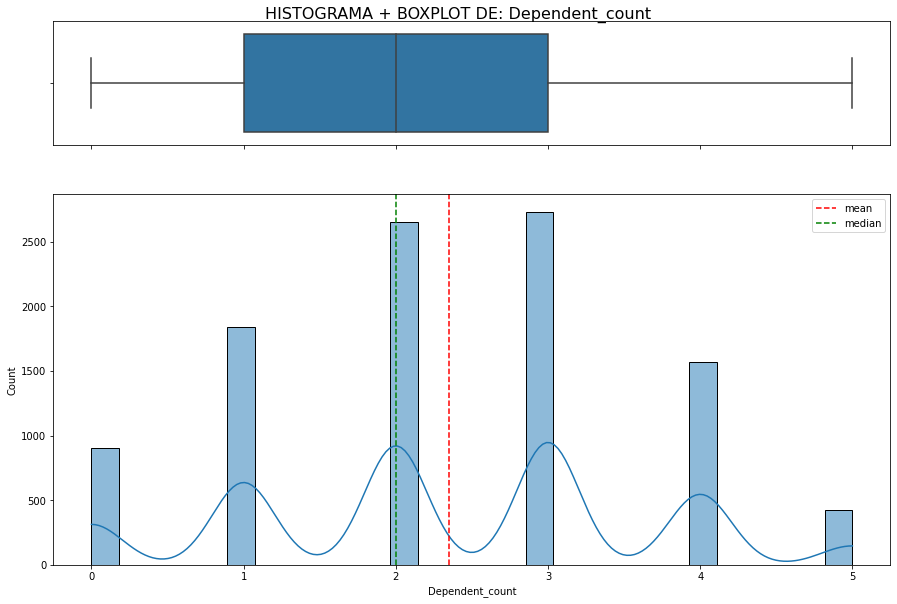

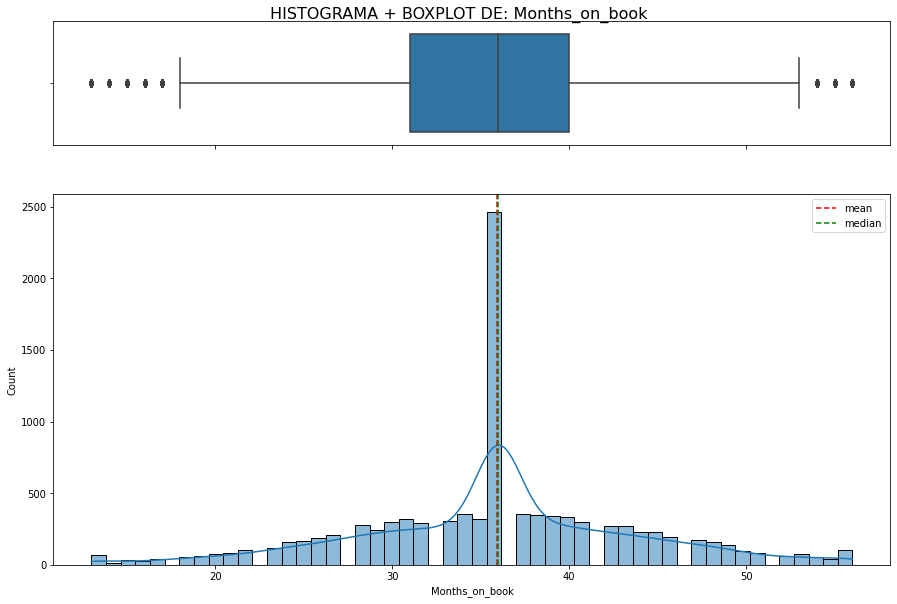

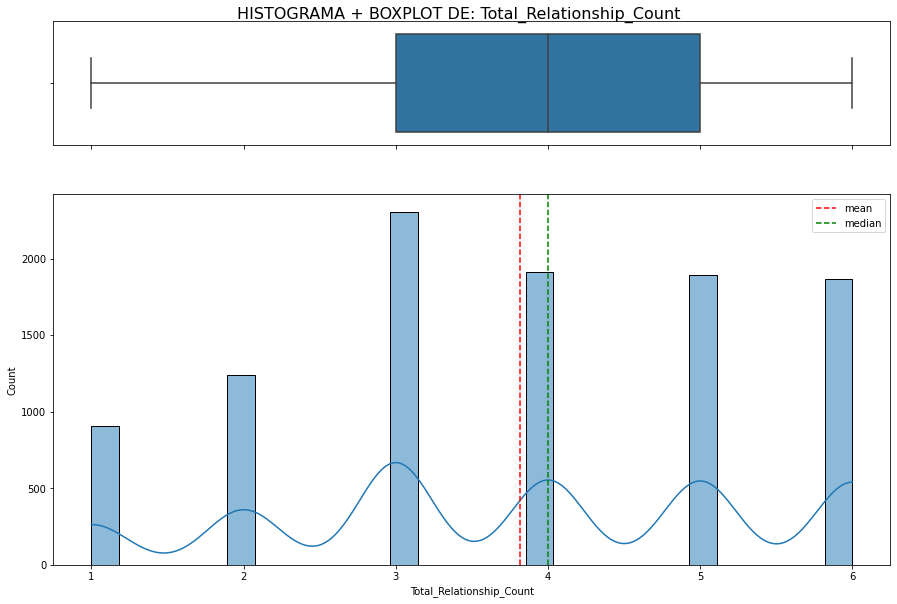

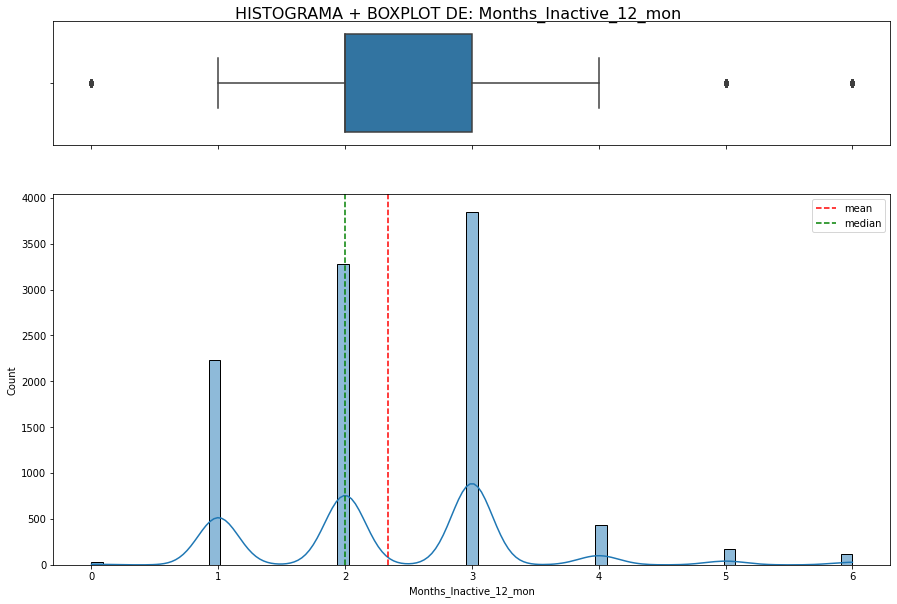

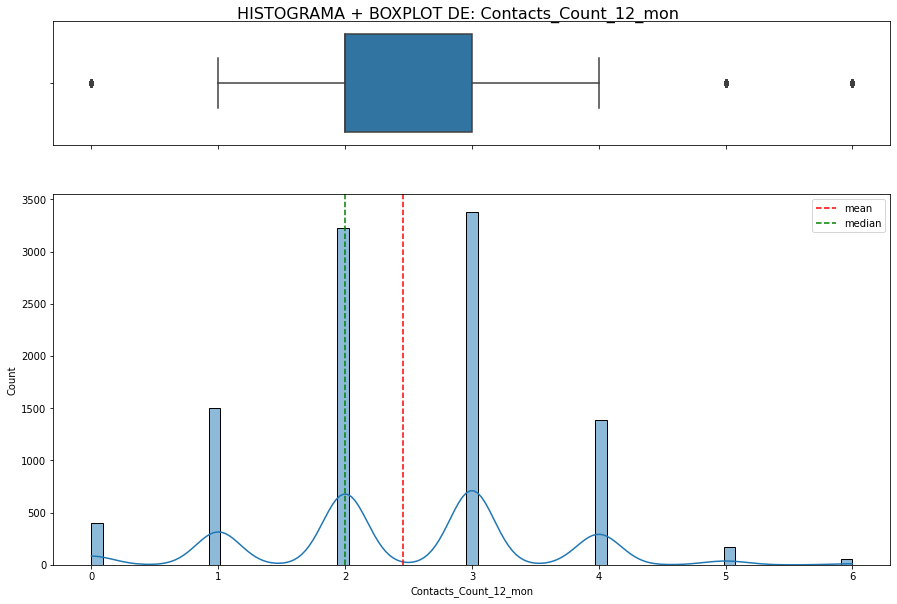

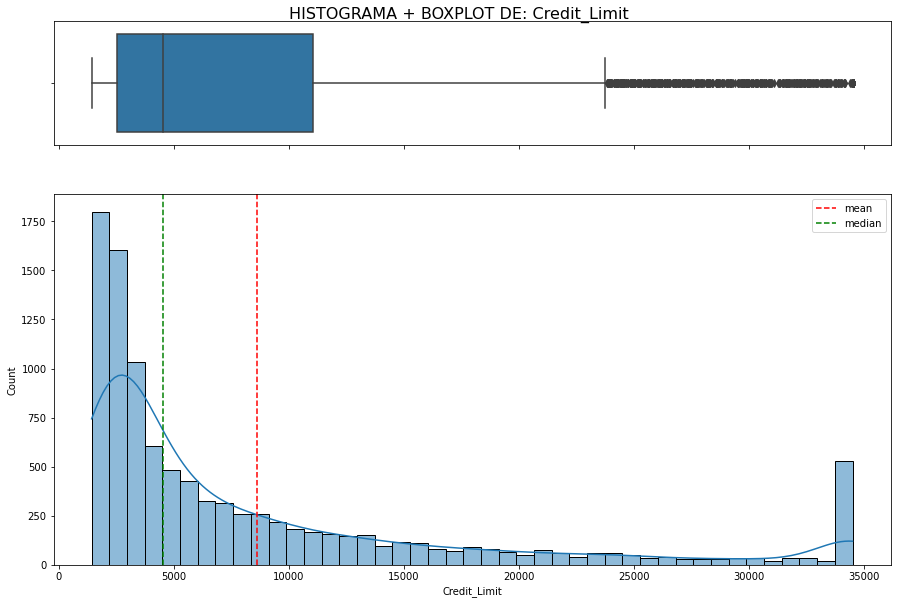

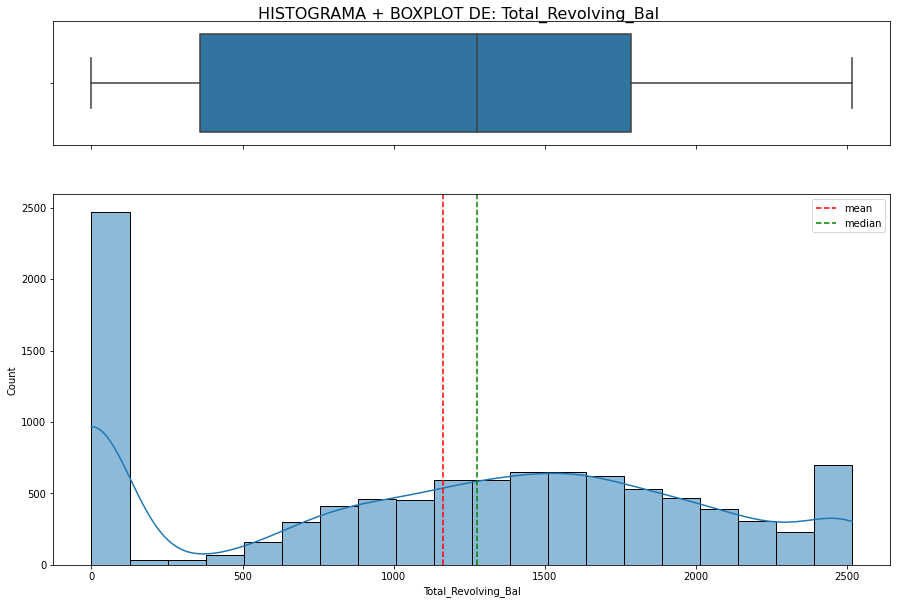

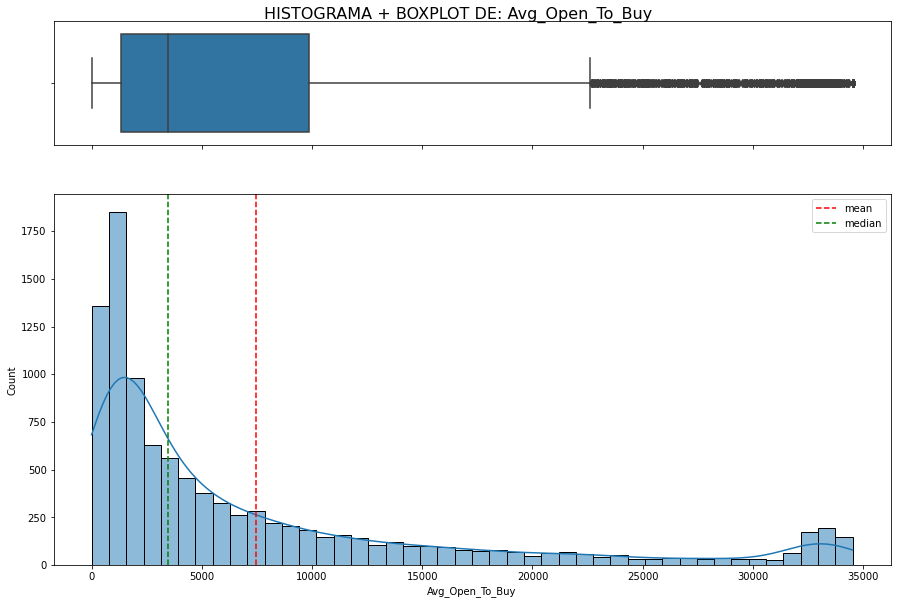

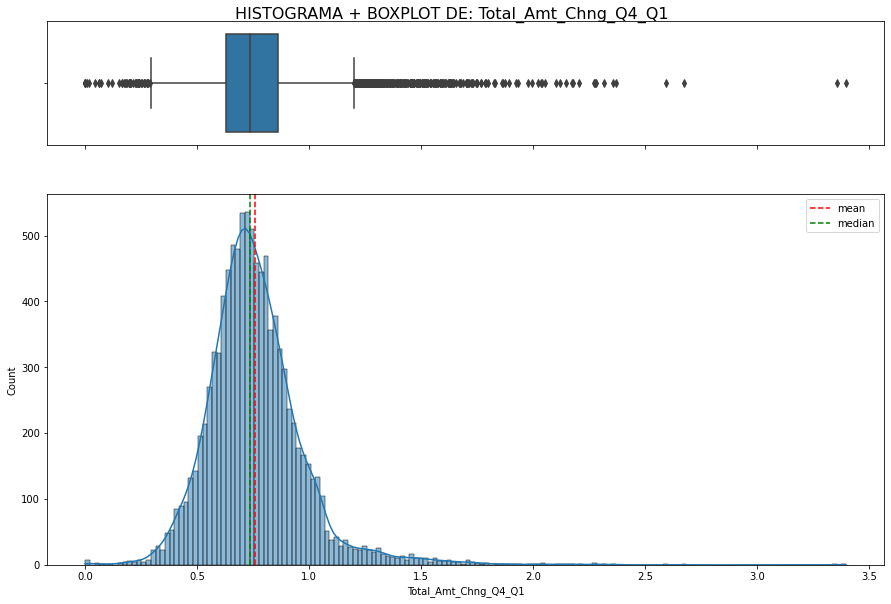

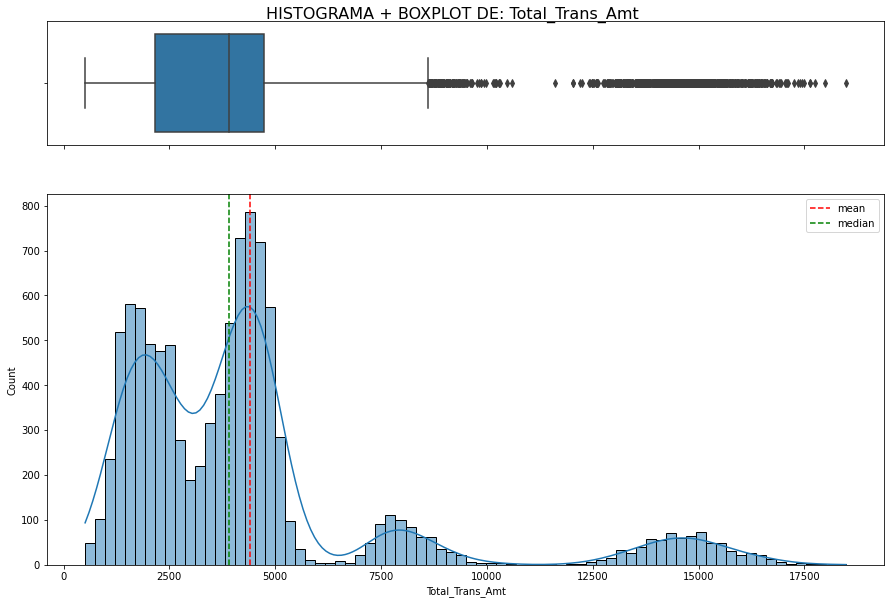

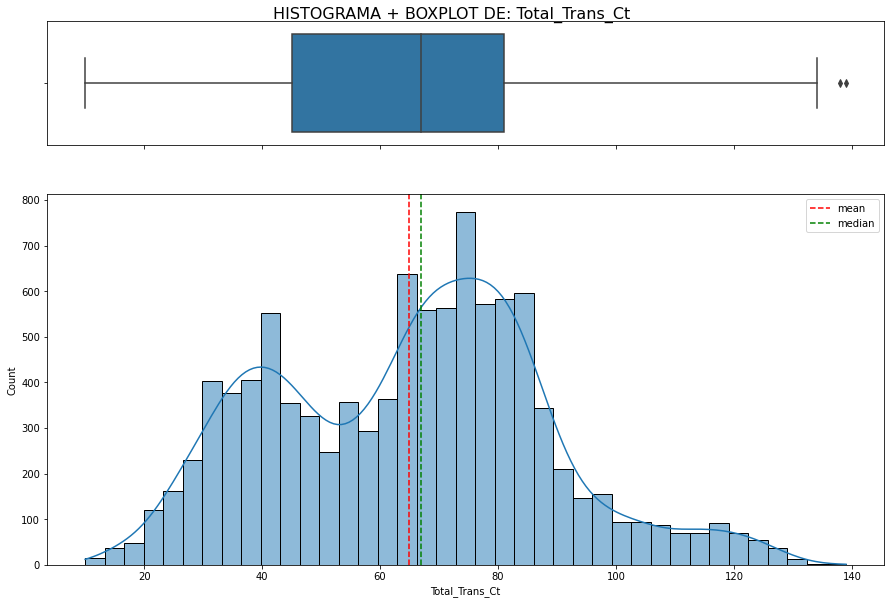

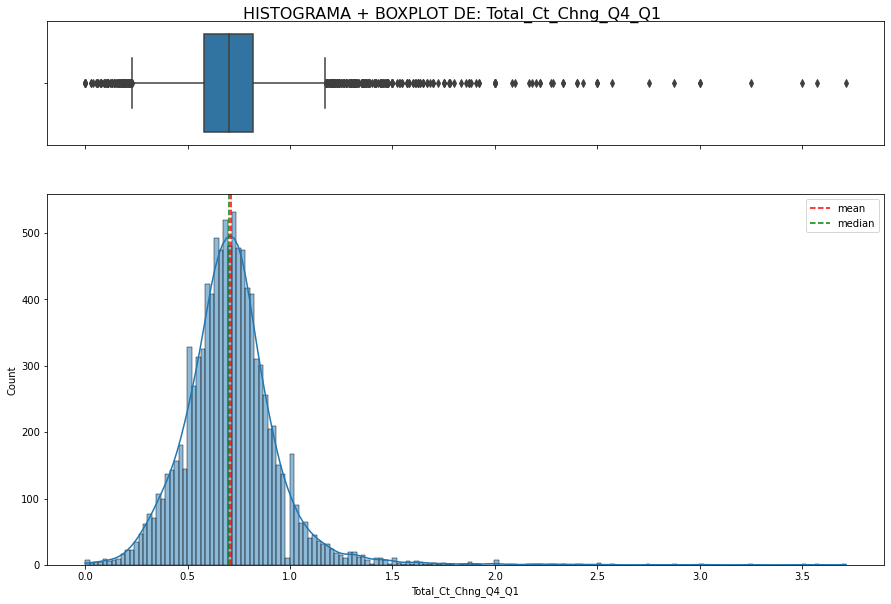

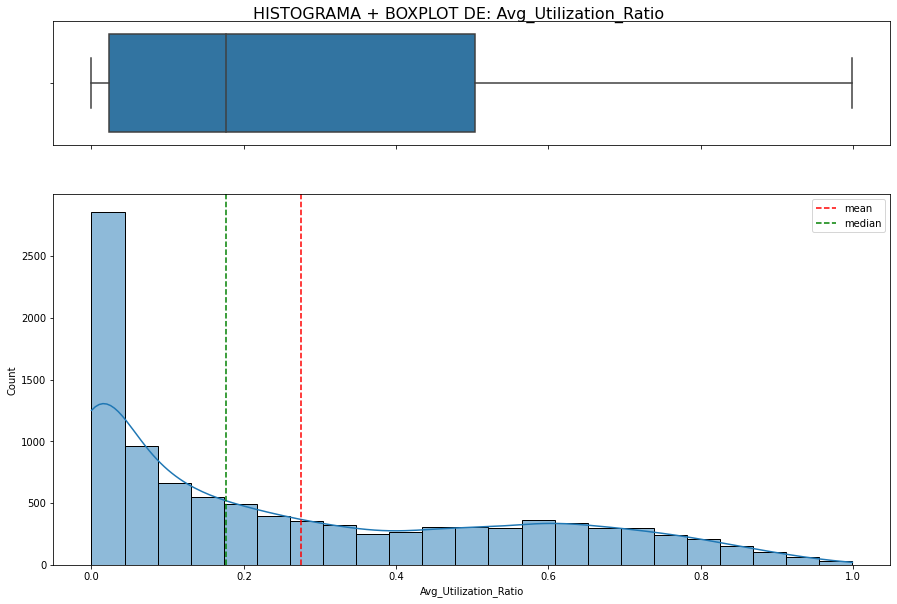

In [17]:
for i in range(len(var_num)):
    hist_box(var_num[i],None)

In [18]:
var_no_num = []
for i in columns_name:
    if i not in var_num:
        var_no_num.append(i)

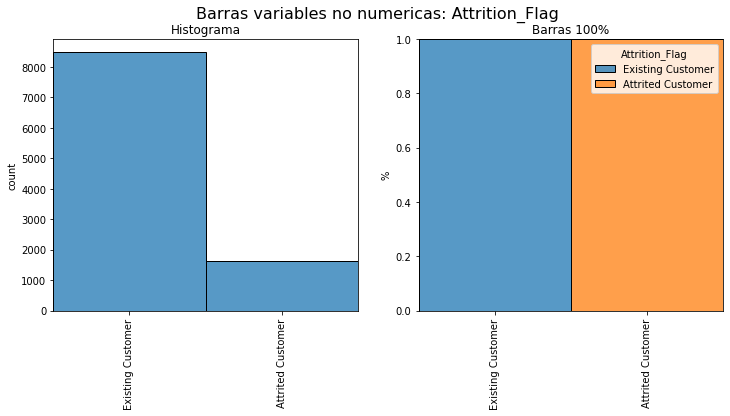

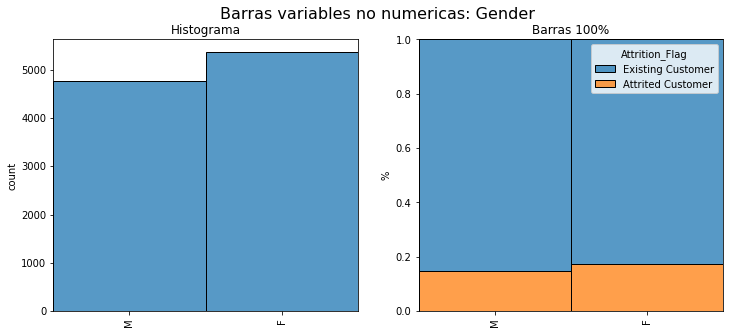

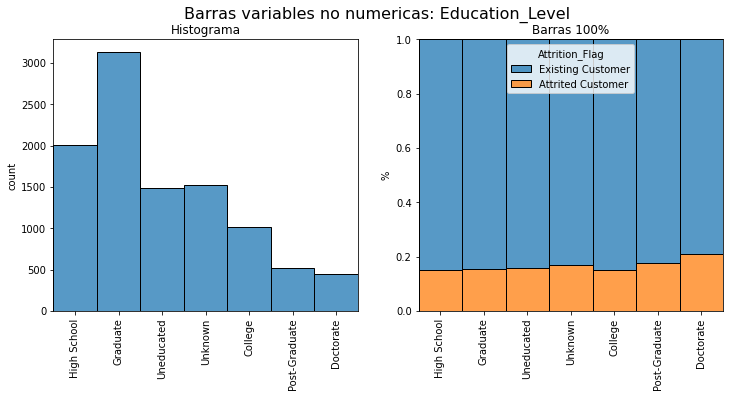

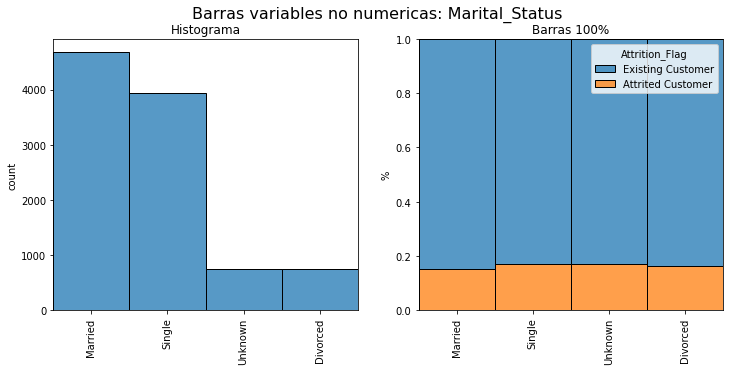

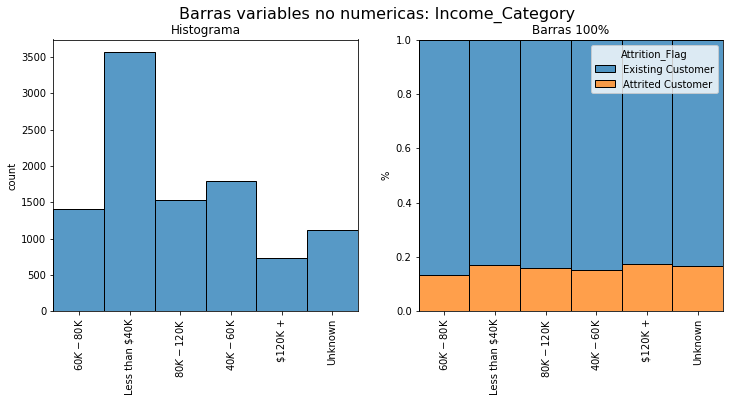

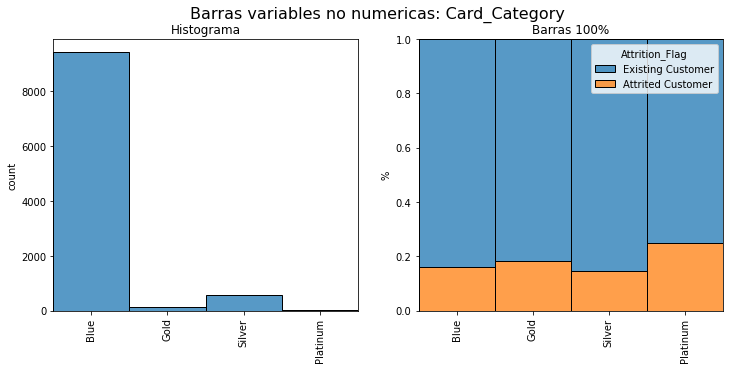

In [19]:
for i in range(len(var_no_num)):
    graf_cat(var_no_num[i])

### Hipótesis 1


H1 = La media del monto total de transacciones (Total_Trans_Amt) es igual para clientes activos y retirados

H0 = La media del monto total de transacciones (Total_Trans_Amt) es diferente para clientes activos y retirados

In [21]:
media_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).mean()
sum_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).sum()
print('media del monto total de transacciones por Attrition Flag')
print(media_tta)
print('_ '*30)
print(' ')
print('suma del monto total de transacciones por Attrition Flag')
print(sum_tta)

media del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    3095.025814
Existing Customer    4654.655882
Name: Total_Trans_Amt, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
suma del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer     5035607
Existing Customer    39564575
Name: Total_Trans_Amt, dtype: int64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H1 y se validaria la H0.

En función de esto, se procede a analizar mas a detalle. Para ello se realizan 2 graficos, un histograma y un boxplot con el objetivo de determinar que tipo de distribucion siguen los datos y para determinar la existencia de outliers. En caso de que se encuentren outliers la media no es una medida muy representativa, por lo que se analizara con la mediana.

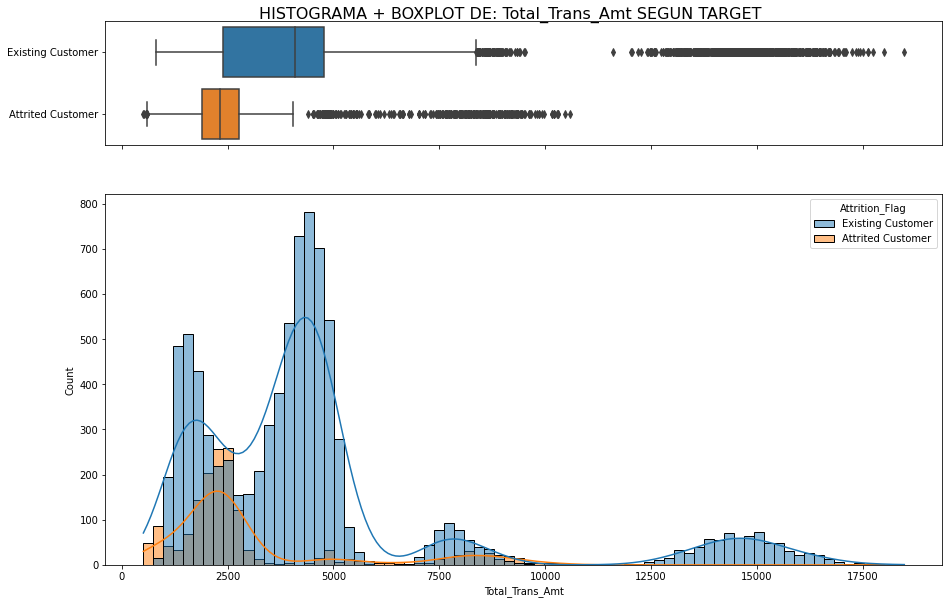

In [22]:
hist_box('Total_Trans_Amt','Attrition_Flag')

Se observa gran cantidad de outliers, por lo que se analizara la mediana.

In [23]:
mediana_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).median()
print('mediana del monto total de transacciones por Attrition Flag')
print(mediana_tta)

mediana del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    2329.0
Existing Customer    4100.0
Name: Total_Trans_Amt, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR 
Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [24]:
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.quantile(0.25)
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.quantile(0.75)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Amt.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Amt.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  1903.5
Q3R =  2772.0
IQR Retirados =  868.5
Q1A =  2384.75
Q3A =  4781.25
IQR Activos =  2396.5


Podemos observar que los montos de las transferencias realizadas por clientes activos se concentran entre los 2384 y 4781 USD. Mientras que los montos de las transferencias realizadas por clientes retirados se encuentran entre los 1903 y 2772 USD

### Hipótesis 2



H2 = La media de la cantidad total de transacciones (Total_Trans_Ct) es igual para clientes activos y retirados

H0 = La media de la cantidad total de transacciones (Total_Trans_Ct) es diferente para clientes activos y retirados



In [25]:
media_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).mean()
sum_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).sum()
print('media del conteo total de transacciones por Attrition Flag')
print(media_ttc)
print('_ '*30)
print(' ')
print('suma del conteo total de transacciones por Attrition Flag')
print(sum_ttc)

media del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    44.933620
Existing Customer    68.672588
Name: Total_Trans_Ct, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
suma del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer     73107
Existing Customer    583717
Name: Total_Trans_Ct, dtype: int64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H2 y se validaria la H0.

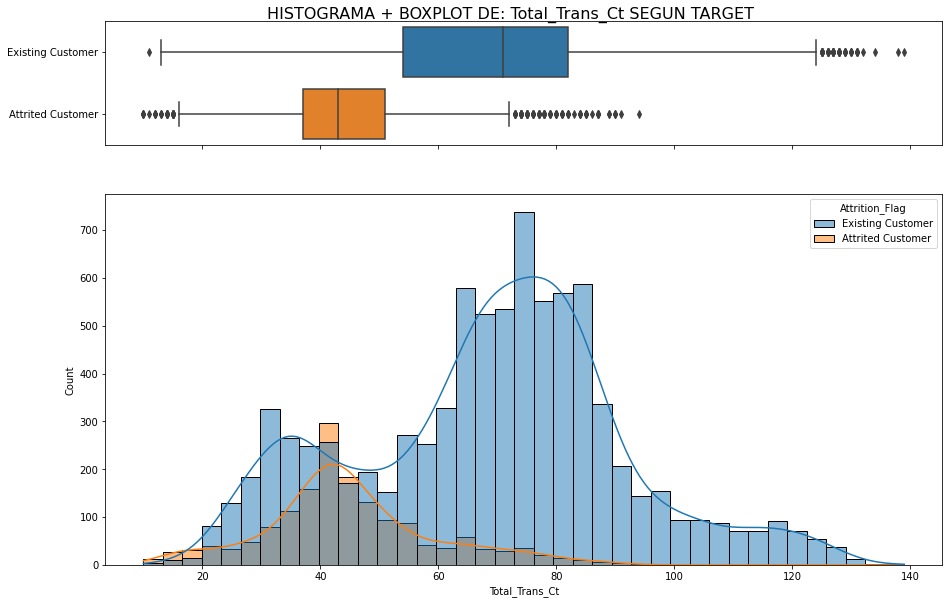

In [26]:
hist_box('Total_Trans_Ct','Attrition_Flag')

In [27]:
mediana_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).median()
print('Mediana del conteo total de transacciones por Attrition Flag')
print(mediana_ttc)

Mediana del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    43.0
Existing Customer    71.0
Name: Total_Trans_Ct, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [28]:
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.quantile(0.75)
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.quantile(0.25)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  37.0
Q3R =  51.0
IQR Retirados =  14.0
Q1A =  54.0
Q3A =  82.0
IQR Activos =  28.0


Podemos observar que la cantiad de transferencias realizada por clientes activos se encunentra entre 54 y 82. Mientras que la cantidad de transferencias realizadas por clientes retirados se concentra entre 37 y 51.

### Hipótesis 3


H3 = La media de la variacion en cantidad de transacciones Q4 -Q1 (1) es igual para clientes activos y retirados

H0 = La media de la variacion en cantidad de transacciones Q4 -Q1 (Total_Ct_Chng_Q4_Q1) es diferente para clientes activos y retirados

In [29]:
media_tcc_Q4Q1= bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).mean()
sum_tcc_Q4Q1 = bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).sum()
print('Media de cantidad de transferencias realizadas por Attrition Flag')
print(media_tcc_Q4Q1)
print('_ '*33)
print(' ')
print('Suma de cantidad de transferencias realizadas por Attrition Flag')
print(sum_tcc_Q4Q1)

Media de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer    0.554386
Existing Customer    0.742434
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Suma de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer     901.986
Existing Customer    6310.690
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H3 y se validaria la H0.

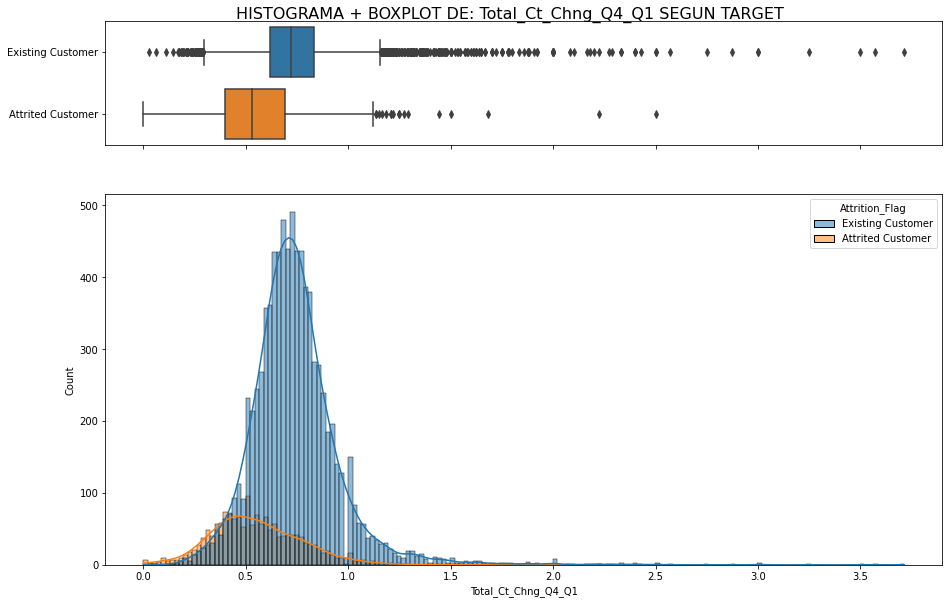

In [30]:
hist_box('Total_Ct_Chng_Q4_Q1','Attrition_Flag')

In [31]:
mediana_tcc_Q4Q1= bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).median()
print('Mediana de cantidad de transferencias realizadas por Attrition Flag')
print(mediana_tcc_Q4Q1)

Mediana de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer    0.531
Existing Customer    0.721
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [32]:
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.75)
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.25)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  0.4
Q3R =  0.692
IQR Retirados =  0.2919999999999999
Q1A =  0.617
Q3A =  0.833
IQR Activos =  0.21599999999999997


Podemos observar que la variación de la cantidad de transferencias realizadas por clientes activos se encuentra entre 0,61 y 0,833. Mientras que la cantidad de transferencias realizadas por clientes retirados se concentra entre 0,4 y 0,692..

### Pregunta 1 ¿Cúal es el género que más abandona la tarjeta de crédito?

In [33]:
gender_count = bank_df['Gender'].groupby(bank_df['Attrition_Flag']).value_counts()
print('Gender_count \n',gender_count)

Gender_count 
 Attrition_Flag     Gender
Attrited Customer  F          930
                   M          697
Existing Customer  F         4428
                   M         4072
Name: Gender, dtype: int64


In [34]:
gender_df = bank_df['Attrition_Flag'].groupby(bank_df['Gender']).value_counts().unstack()
gender_df['%_out'] = gender_df['Attrited Customer'] / (gender_df['Attrited Customer'] + gender_df['Existing Customer'])
gender_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Gender,,,
F,930,4428,0.173572
M,697,4072,0.146152


Dentro del género femenino, abandonan aproximadamente un 17%

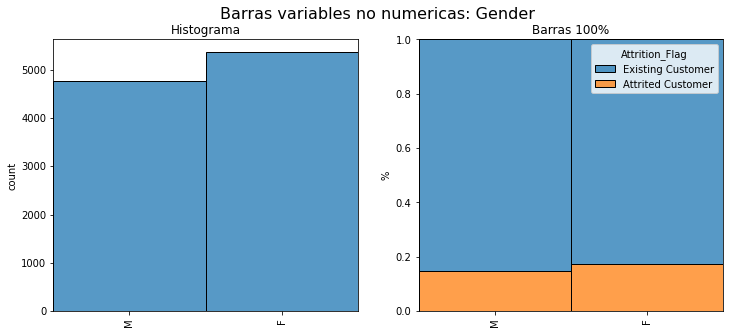

In [35]:
graf_cat('Gender')

### Pregunta 2: ¿Cúal es el estado civil de los clientes que abandonan el servicio?


In [36]:
marital_statuts_count = bank_df['Marital_Status'].groupby(bank_df['Attrition_Flag']).value_counts()
print('Marital_statuts_count \n',marital_statuts_count,)

Marital_statuts_count 
 Attrition_Flag     Marital_Status
Attrited Customer  Married            709
                   Single             668
                   Unknown            129
                   Divorced           121
Existing Customer  Married           3978
                   Single            3275
                   Divorced           627
                   Unknown            620
Name: Marital_Status, dtype: int64


In [37]:
marital_status_df = bank_df['Attrition_Flag'].groupby(bank_df['Marital_Status']).value_counts().unstack()
marital_status_df['%_out'] = marital_status_df['Attrited Customer'] / (marital_status_df['Attrited Customer'] + marital_status_df['Existing Customer'])
marital_status_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Marital_Status,,,
Unknown,129,620,0.172230
Single,668,3275,0.169414
Divorced,121,627,0.161765
Married,709,3978,0.151269


Dentro del genero desconocido, un 17% abandona el servicio 

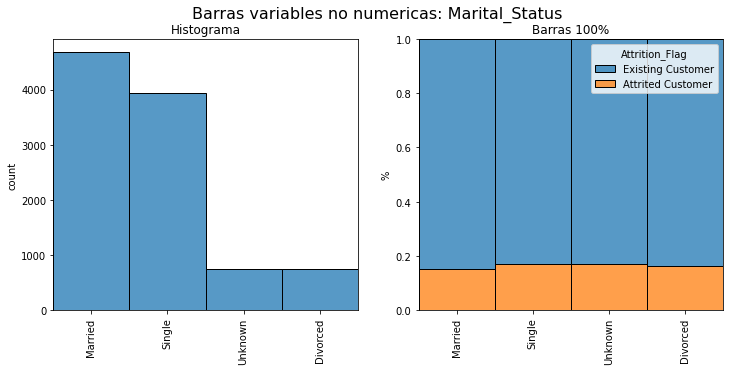

In [38]:
graf_cat('Marital_Status')

### Pregunta 3 ¿Que edades promedio tienen las personas que abandonan las tarjetas de crédito?

In [42]:
mean_years = bank_df['Customer_Age'].groupby(bank_df['Attrition_Flag']).mean()

print('mean_time Attrtied Customer\n',mean_years['Attrited Customer'])
print('mean_time Existing Customer\n',mean_years['Existing Customer'])

mean_time Attrtied Customer
 46.659496004917024
mean_time Existing Customer
 46.26211764705882


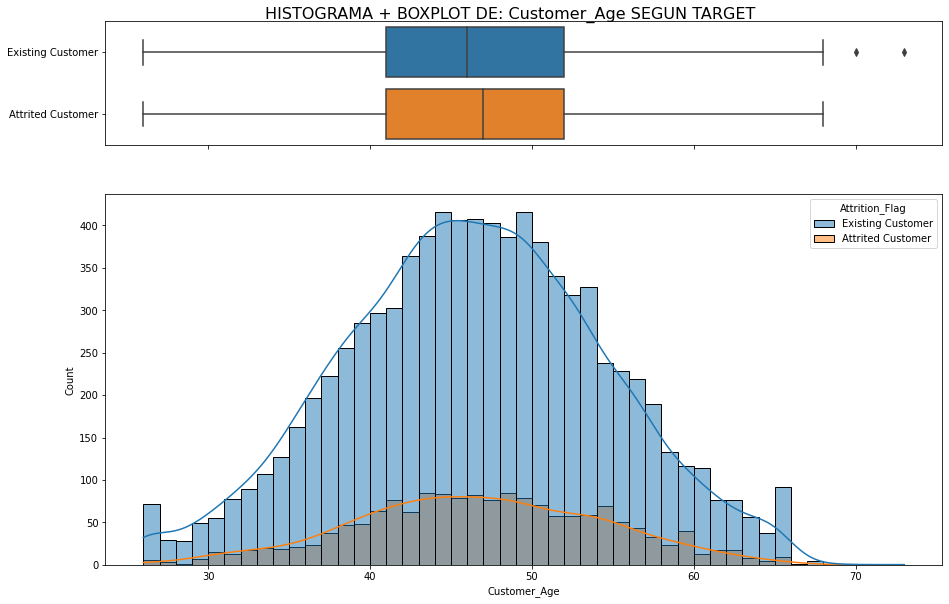

In [41]:
hist_box('Customer_Age','Attrition_Flag')

### Pregunta 4 ¿Cuanto tiempo sin utilizacion llevan las tarjetas de los clientes que abandonan?

In [43]:
mean_time = bank_df['Months_Inactive_12_mon'].groupby(bank_df['Attrition_Flag']).mean()
print('mean_time Attried Customer\n',mean_time['Attrited Customer'])
print('mean_time Existing Customer\n',mean_time['Existing Customer'])

mean_time Attried Customer
 2.693300553165335
mean_time Existing Customer
 2.273764705882353


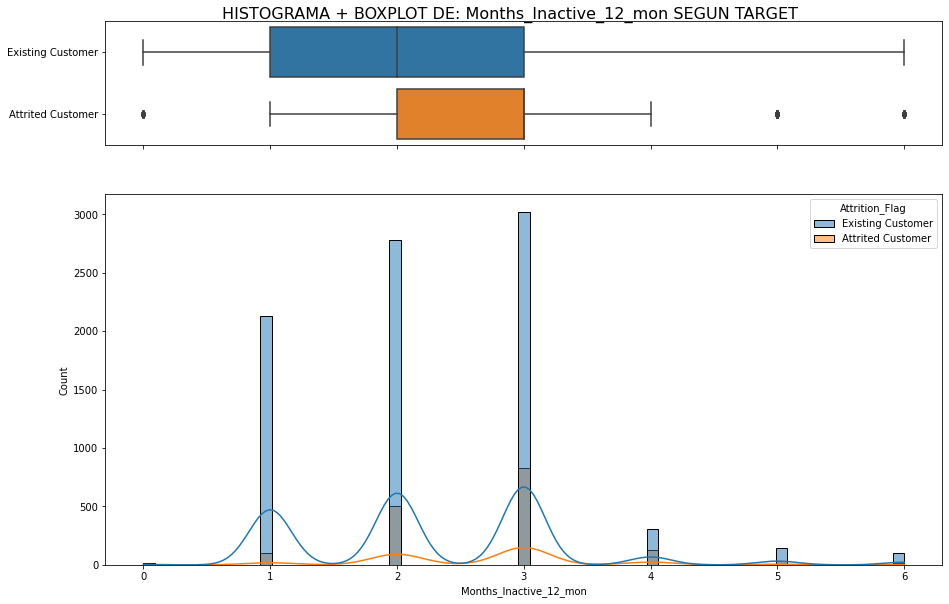

In [44]:
hist_box('Months_Inactive_12_mon','Attrition_Flag')

### Pregunta 5 ¿Que tipo de tarjeta usan los clientes que abandonan los servicios?

In [45]:
card_type = bank_df['Card_Category'].groupby(bank_df['Attrition_Flag']).value_counts()
print('card_type \n',card_type)

card_type 
 Attrition_Flag     Card_Category
Attrited Customer  Blue             1519
                   Silver             82
                   Gold               21
                   Platinum            5
Existing Customer  Blue             7917
                   Silver            473
                   Gold               95
                   Platinum           15
Name: Card_Category, dtype: int64


In [46]:
card_type_df = bank_df['Attrition_Flag'].groupby(bank_df['Card_Category']).value_counts().unstack()
card_type_df['%_out'] = card_type_df['Attrited Customer'] / (card_type_df['Attrited Customer'] + card_type_df['Existing Customer'])
card_type_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Card_Category,,,
Platinum,5,15,0.250000
Gold,21,95,0.181034
Blue,1519,7917,0.160979
Silver,82,473,0.147748


Dentro de la categoria platinum, un 25% abandona el servicio. 

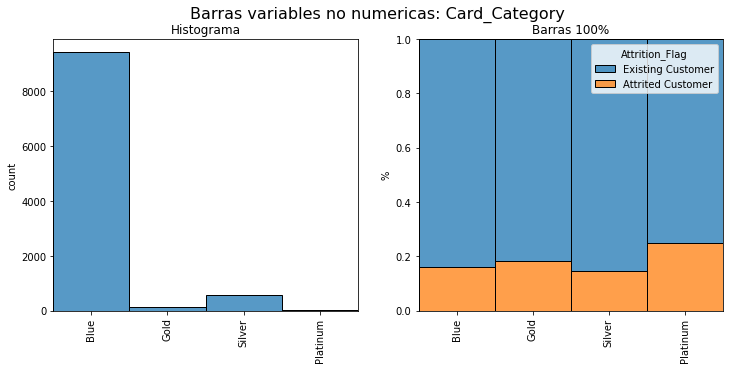

In [47]:
graf_cat('Card_Category')

### Pregunta 6 ¿Que nivel de educacion tienen los clientes que abanonan los servicios?

In [48]:
education_count = bank_df['Education_Level'].groupby(bank_df['Attrition_Flag']).value_counts()
print('education_count \n',education_count)

education_count 
 Attrition_Flag     Education_Level
Attrited Customer  Graduate            487
                   High School         306
                   Unknown             256
                   Uneducated          237
                   College             154
                   Doctorate            95
                   Post-Graduate        92
Existing Customer  Graduate           2641
                   High School        1707
                   Unknown            1263
                   Uneducated         1250
                   College             859
                   Post-Graduate       424
                   Doctorate           356
Name: Education_Level, dtype: int64


In [49]:
education_df = bank_df['Attrition_Flag'].groupby(bank_df['Education_Level']).value_counts().unstack()
education_df['%_out'] = education_df['Attrited Customer'] / (education_df['Attrited Customer'] + education_df['Existing Customer'])
education_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Education_Level,,,
Doctorate,95,356,0.210643
Post-Graduate,92,424,0.178295
Unknown,256,1263,0.168532
Uneducated,237,1250,0.159381
Graduate,487,2641,0.155691
College,154,859,0.152024
High School,306,1707,0.152012




Dentro de el nivel de educacion Doctorado, el 21% abandona el servicio 

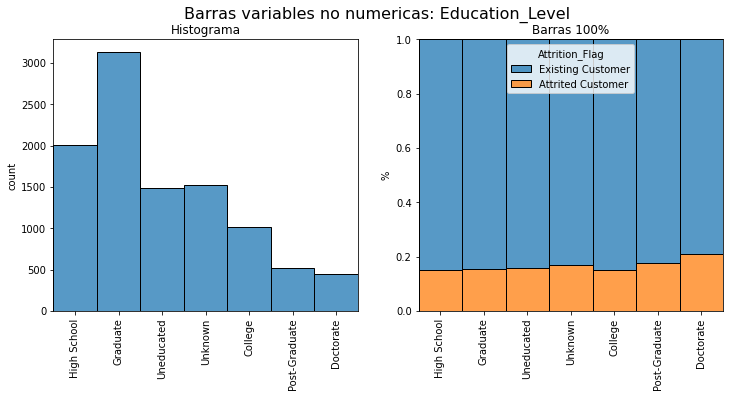

In [50]:
graf_cat('Education_Level')

### Pregunta 7 ¿Que nivel de ingresos tienen los clientes que abandonan los servicios?

In [51]:
income_level = bank_df['Income_Category'].groupby(bank_df['Attrition_Flag']).value_counts()
print('income_level \n',income_level)

income_level 
 Attrition_Flag     Income_Category
Attrited Customer  Less than $40K      612
                   $40K - $60K         271
                   $80K - $120K        242
                   $60K - $80K         189
                   Unknown             187
                   $120K +             126
Existing Customer  Less than $40K     2949
                   $40K - $60K        1519
                   $80K - $120K       1293
                   $60K - $80K        1213
                   Unknown             925
                   $120K +             601
Name: Income_Category, dtype: int64


In [52]:
income_lvl_df = bank_df['Attrition_Flag'].groupby(bank_df['Income_Category']).value_counts().unstack()
income_lvl_df['%_out'] = income_lvl_df['Attrited Customer'] / (income_lvl_df['Attrited Customer'] + income_lvl_df['Existing Customer'])
income_lvl_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Income_Category,,,
$120K +,126,601,0.173315
Less than $40K,612,2949,0.171862
Unknown,187,925,0.168165
$80K - $120K,242,1293,0.157655
$40K - $60K,271,1519,0.151397
$60K - $80K,189,1213,0.134807


Dentro del nivel de ingresos de +120K, el 17,3% abandona el servicio.

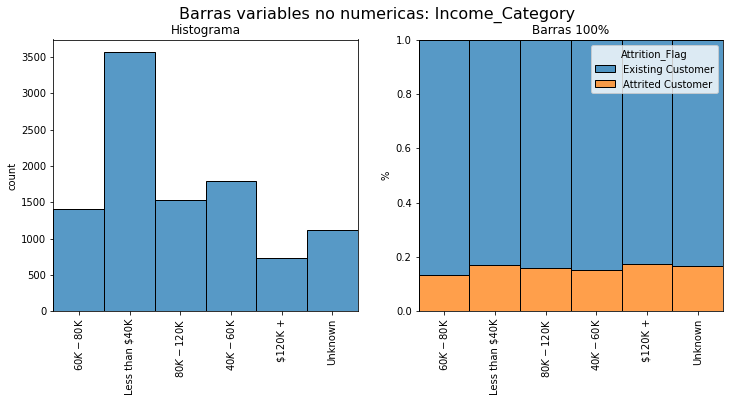

In [53]:
graf_cat('Income_Category')

## Correlación de variables

Se procede a realizar una matriz de correlación para poder determinar si existe o no una relación entre las diferentes variables

Para evitar confusion en los datos, se hace la matriz de correlacion pero con los valores absoltuos. De esta forma, todos los coeficientes seran positivos.

Podemos observar que la matriz de correlacion solo se calcula sobre valores numericos. Los valores categoricos fueron quitados de los datos de forma automatica.

**MATRIZ DE CORRELACION PEARSON**


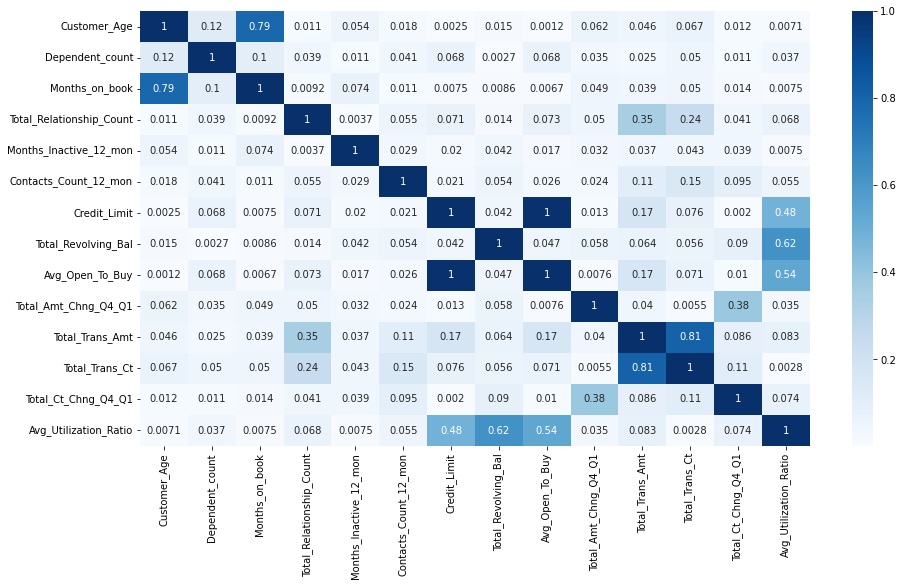

In [54]:
plt.figure(figsize=(15,8)).set_facecolor('white')
sns.heatmap(data=bank_df.corr(method='pearson').abs(),
            annot = True,
            cmap='Blues')
plt.show()

**MATRIZ DE CORRELACION KENDALL**

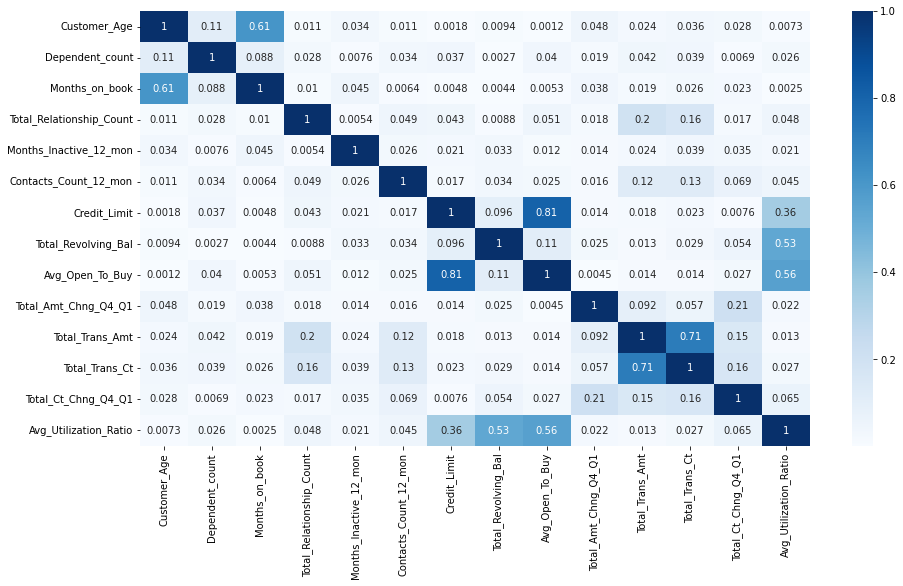

In [55]:
plt.figure(figsize=(15,8)).set_facecolor('white')
sns.heatmap(data=bank_df.corr(method='kendall').abs(),
            annot = True,
            cmap='Blues')
plt.show()

**MATRIZ DE CORRELACION SPEARMAN**

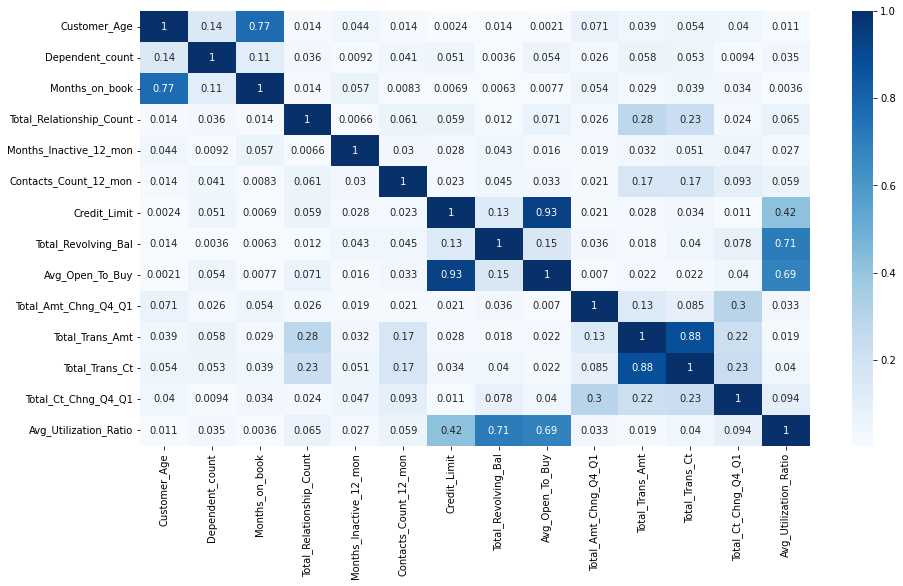

In [56]:
plt.figure(figsize=(15,8)).set_facecolor('white')
sns.heatmap(data=bank_df.corr(method='spearman').abs(),
            annot = True,
            cmap='Blues')
plt.show()

En los datos tenemos valores categoricos o del tipo "object" por lo que no podremos sacar mayores conclusiones sin antes quitarlos.

In [57]:
df = bank_df.drop(columns=['Card_Category','Marital_Status','Income_Category','Education_Level','Gender','Attrition_Flag'])   
# Aqui quitamos todas las columnas categoricas

In [58]:
df2 =correlaciones(df,10,'pearson')
df2.head()

Credit_Limit         Avg_Open_To_Buy          0.995981
Total_Trans_Amt      Total_Trans_Ct           0.807192
Customer_Age         Months_on_book           0.788912
Total_Revolving_Bal  Avg_Utilization_Ratio    0.624022
Avg_Open_To_Buy      Avg_Utilization_Ratio    0.538808
dtype: float64

In [59]:
df3 =correlaciones(df,10,'kendall')
df3.head()

Credit_Limit         Avg_Open_To_Buy          0.805012
Total_Trans_Amt      Total_Trans_Ct           0.707857
Customer_Age         Months_on_book           0.613382
Avg_Open_To_Buy      Avg_Utilization_Ratio    0.561205
Total_Revolving_Bal  Avg_Utilization_Ratio    0.533326
dtype: float64

In [60]:
df4 =correlaciones(df,10,'spearman')
df4.head()

Credit_Limit         Avg_Open_To_Buy          0.931431
Total_Trans_Amt      Total_Trans_Ct           0.879725
Customer_Age         Months_on_book           0.768901
Total_Revolving_Bal  Avg_Utilization_Ratio    0.708607
Avg_Open_To_Buy      Avg_Utilization_Ratio    0.685716
dtype: float64

Se hizo un analisis de correlacion segun los 3 tipos de coeficientes y el top5 de variables con mayor correlacion sigue siendo el mismo 

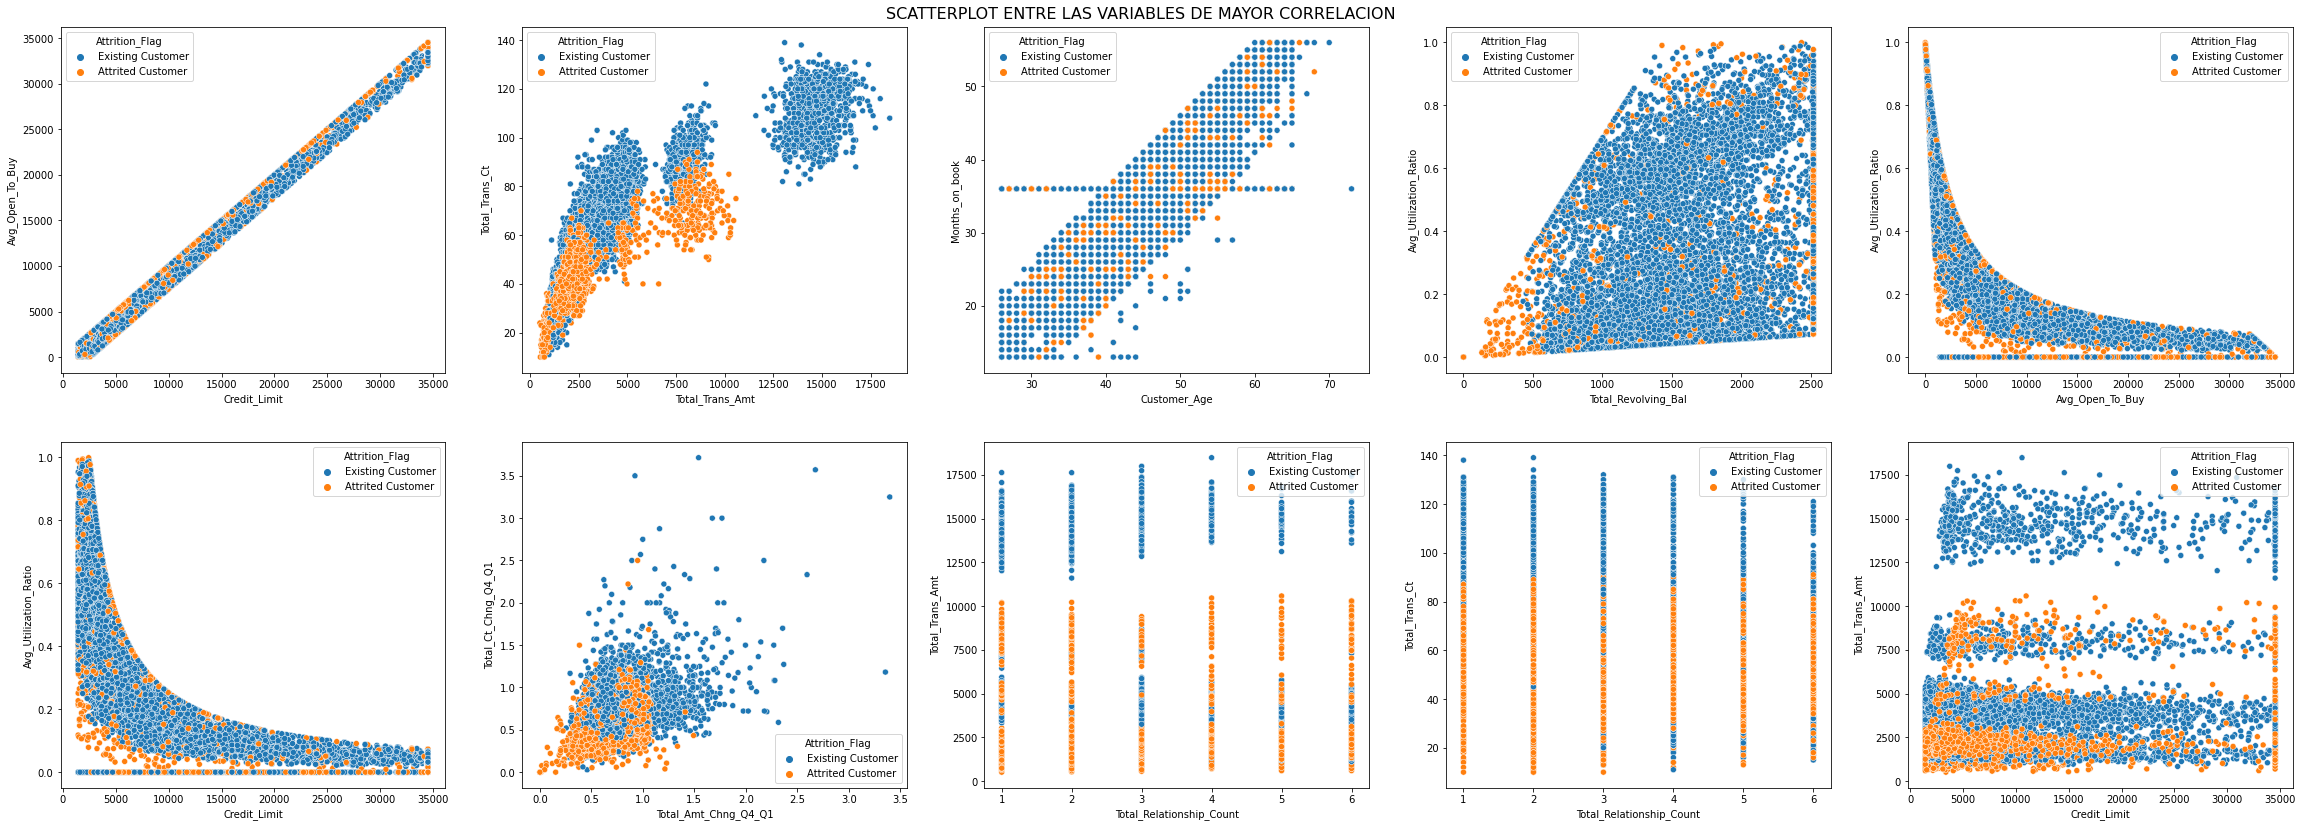

In [61]:
fig , axes = plt.subplots(2,5,figsize = (40,14))
plt.suptitle('SCATTERPLOT ENTRE LAS VARIABLES DE MAYOR CORRELACION',fontsize=16,y = 0.9)

i = 0
for fil in range(2):
  for col in range(5):
        sns.scatterplot(data=bank_df,
                      ax=axes[fil,col],
                      x=df2.index[i][0], 
                      y=df2.index[i][1],
                      hue ="Attrition_Flag"
                      )
        i = i + 1
plt.show()

In [62]:
i = 0
for fil in range(2):
  for col in range(5):
    titulo = f"Correlación entre {df2.index[i][0]} & {df2.index[i][1]} = {df2[i]}"
    sns.jointplot(ax = axes,
                    data=bank_df,
                    x=df2.index[i][0], 
                    y=df2.index[i][1],
                    hue ="Attrition_Flag",
                    kind="scatter",
                    marker = '2',
                    alpha=1,
                    height= 10,
                    ratio = 5,
                    xlim = (bank_df[df2.index[i][0]].min(),bank_df[df2.index[i][0]].max()),
                    ylim = (bank_df[df2.index[i][1]].min(),bank_df[df2.index[i][1]].max())
                    ).figure.set_facecolor('white')
    # .figure.set_facecolor('white') con este metodo de plt.figure podemos darle fondo blanco a todo. 
    # el jointplot de seaborn es una JointGrid que tiene los mismos metodos que las figure de plt.
    
    plt.suptitle(titulo,fontsize=16,y = 1.01)
    plt.show()
    i = i + 1

Output hidden; open in https://colab.research.google.com to view.

Tenemos algunas relaciones lineales mas fuertes entre algunas variables como 

- Credit_Limit / Avg_Open_To_Buy = 0.995981

- Total_Trans_Amt / Total_Trans_Ct = 0.807192

- Customer_Age / Months_on_book = 0.788912

- Total_Revolving_Bal / Avg_Utilization_Ratio = 0.624022

Por otro lado, tenemos otras variables que tienen la siguiente relacion lineal:

- Avg_Open_To_Buy / Avg_Utilization_Ratio = 0.538807

- Credit_Limit / Avg_Utilization_Ratio = 0.482965

La misma NO es muy elevada. Pero observando los graficos anteriores, podemos notar un comportamiento logaritmico. 

# 5-Prueba de modelos

Antes de comenzar a probar diferentes modelos, vamos a realizar algunas transfomraciones en los datos. 


## Transformacion de datos

In [63]:
cat_columns = bank_df.drop('Attrition_Flag',axis=1).select_dtypes(include='object').columns
numeric_columns = bank_df.select_dtypes(include=np.number).columns

In [64]:
cat_columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [65]:
numeric_columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [66]:
lista = []
for col in cat_columns:
  info = (col, bank_df[col].nunique(), bank_df[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['feature', 'cantidad', 'valores'])

,feature,cantidad,valores
0,Gender,2,"[M, F]"
1,Education_Level,7,"[High School, Graduate, Uneducated, Unknown, C..."
2,Marital_Status,4,"[Married, Single, Unknown, Divorced]"
3,Income_Category,6,"[$60K - $80K, Less than $40K, $80K - $120K, $4..."
4,Card_Category,4,"[Blue, Gold, Silver, Platinum]"


En funcion de esto y de la naturaleza de las mismas, decidimos codificarlas de la siguiente forma. El nivel de educacion, nivel de ingresos y categoria de tarjeta de credito, lo codificamos con un label encoder ya que pueden ordenarse. Y las otras dos variables, que son genero y estado civil los clasificamos con un OHE ya que no tiene un ordenamiento. 

In [67]:
bank_df.Attrition_Flag.value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

Tambien observamos que los clientes que dejan el servicio son un porcentaje muy bajo del total, por lo que va a ser necesario dividir los conjuntos de manera estratificada. 

In [68]:
X = bank_df.drop('Attrition_Flag',axis=1)
y = bank_df['Attrition_Flag']

In [69]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state =7 ,stratify = y)

In [70]:
X_train['Education_Level'].unique()

array(['College', 'Graduate', 'Unknown', 'High School', 'Post-Graduate',
       'Doctorate', 'Uneducated'], dtype=object)

In [71]:
X_train['Income_Category'].unique()

array(['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       '$120K +', 'Unknown'], dtype=object)

Este sera el ordenamiento que le vamos a dar a las variables cateogricas en el OrdinalEncoder

In [72]:
orden_educacion = ['Unknown','Uneducated','Graduate','Post-Graduate','High School','College','Doctorate']
orden_income_cat = ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']
orden_card_cat = ['Blue','Silver','Gold','Platinum']

In [75]:
enc_ordenado = OrdinalEncoder(categories=[orden_educacion,orden_income_cat,orden_card_cat])

In [76]:
enc_ordenado.fit(X_train[['Education_Level','Income_Category','Card_Category']])

OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'Graduate',
                            'Post-Graduate', 'High School', 'College',
                            'Doctorate'],
                           ['Unknown', 'Less than $40K', '$40K - $60K',
                            '$60K - $80K', '$80K - $120K', '$120K +'],
                           ['Blue', 'Silver', 'Gold', 'Platinum']])

In [77]:
X_train_t1 = X_train.copy()

In [78]:
X_train_t1[['Education_Level','Income_Category','Card_Category']] = enc_ordenado.transform(X_train[['Education_Level','Income_Category','Card_Category']])

Y estas seran las variables que quedan que no son numericas. Las mismas seran codificadas mediante un OHE

In [79]:
X_train_t1.select_dtypes(include='object').columns

Index(['Gender', 'Marital_Status'], dtype='object')

In [80]:
ohe = OneHotEncoder(drop='first')

In [81]:
ohe.fit(X_train_t1[['Gender','Marital_Status']])

OneHotEncoder(drop='first')

Estas que vemos a continuacion son las columnas de salida

In [82]:
ohe.get_feature_names_out(['Gender','Marital_Status'])

array(['Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown'], dtype=object)

Creamos un DataFrame con las nuevas columnas codificadas

In [83]:
enc_data = pd.DataFrame(ohe.fit_transform(X_train_t1[['Gender','Marital_Status']]).toarray(),
                        columns=ohe.get_feature_names_out(['Gender','Marital_Status']),
                        index=X_train.index)

Luego creamos un nuevo DataFrame de training, uniendo el DataFrame anterior, con el generado por el OHE. Junto con esto, dropeamos las columas que ahora se encuentran codificadas ('Gender','Marital_Status')

In [84]:
X_train_t2 = X_train_t1.join(enc_data).drop(columns=['Gender','Marital_Status'])

Hacemos lo mismo con los datos de test

In [85]:
X_test_t1 = X_test.copy()
X_test_t1[['Education_Level','Income_Category','Card_Category']] = enc_ordenado.transform(X_test[['Education_Level','Income_Category','Card_Category']])

In [86]:
enc_data_2 = pd.DataFrame(ohe.fit_transform(X_test_t1[['Gender','Marital_Status']]).toarray(),
                          columns=ohe.get_feature_names_out(['Gender','Marital_Status'])
                          ,index=X_test.index)
X_test_t2 = X_test_t1.join(enc_data_2).drop(columns=['Gender','Marital_Status'])

Codificamos tambien nuestro conjunto "Y". Dandole valor de "1" a la categoria que nos interesa predecir, en este caso nos interesa detectar los Attrited Customer

In [87]:
y_train = y_train.replace({'Attrited Customer':1,'Existing Customer':0})
y_test = y_test.replace({'Attrited Customer':1,'Existing Customer':0})

## LogisticRegression

In [88]:
log_reg = LogisticRegression(max_iter=800,n_jobs=-1)
log_reg.fit(X_train_t2,y_train)
pred_log_reg = log_reg.predict(X_test_t2)

In [89]:
print(classification_report(y_test, pred_log_reg))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1701
           1       0.74      0.45      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026



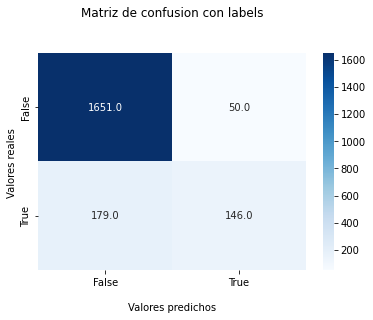

In [91]:
mat_conf(y_test,pred_log_reg)

## KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier(n_neighbors=9) # Instanciamos el clasificador k veces es decir k vecinos cercanos
knn.fit(X_train_t2, y_train)
predicciones_knn = knn.predict(X_test_t2)

In [95]:
print(classification_report(y_test, predicciones_knn))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.55      0.63       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.78      2026
weighted avg       0.89      0.90      0.89      2026



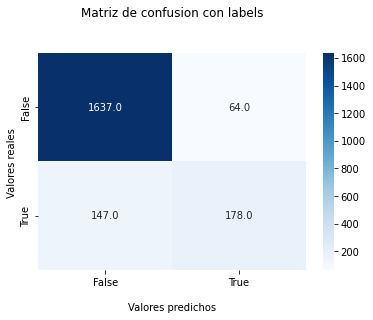

In [96]:
mat_conf(y_test,predicciones_knn)

## RandomForestClassifier

In [97]:
clf = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')
clf.fit(X_train_t2, y_train)
y_pred_RFC = clf.predict(X_test_t2)

In [98]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1701
           1       0.91      0.54      0.68       325

    accuracy                           0.92      2026
   macro avg       0.91      0.76      0.81      2026
weighted avg       0.92      0.92      0.91      2026



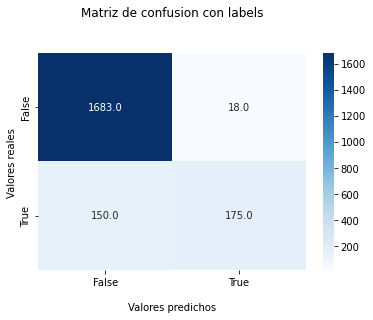

In [99]:
mat_conf(y_test,y_pred_RFC)